In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import torch
import matplotlib.pyplot as plt

In [2]:
data_test = pd.read_csv('Google_Stock_Price_Test.csv.xls',thousands=',')
data_test

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,1657300
1,1/4/2017,788.36,791.34,783.16,786.90,1073000
2,1/5/2017,786.08,794.48,785.02,794.02,1335200
3,1/6/2017,795.26,807.90,792.20,806.15,1640200
4,1/9/2017,806.40,809.97,802.83,806.65,1272400
5,1/10/2017,807.86,809.13,803.51,804.79,1176800
6,1/11/2017,805.00,808.15,801.37,807.91,1065900
7,1/12/2017,807.14,807.39,799.17,806.36,1353100
8,1/13/2017,807.48,811.22,806.69,807.88,1099200
9,1/17/2017,807.08,807.14,800.37,804.61,1362100


In [3]:
y_test_open = data_test['Open']
y_test_high = data_test['High']
y_test_low = data_test['Low']
y_test_close = data_test['Close']
y_test_vol = data_test['Volume']


In [4]:
VRNN = [[7.8091956e+02, 7.8505707e+02, 7.6976617e+02, 7.8209106e+02, 1.5294341e+06],
 [7.7545880e+02, 7.8148907e+02, 7.6586285e+02, 7.7365088e+02, 2.0219754e+06],
 [7.8032397e+02, 7.8474475e+02, 7.7004602e+02, 7.8312476e+02, 1.8743698e+06],
 [7.8560193e+02, 7.8954315e+02, 7.7498029e+02, 7.9071460e+02, 1.7722012e+06],
 [7.8654425e+02, 7.9125745e+02, 7.7601270e+02, 7.9468408e+02, 1.9324361e+06],
 [7.9438300e+02, 7.9935938e+02, 7.8393231e+02, 8.0667902e+02, 2.0339580e+06],
 [8.0279828e+02, 8.0672882e+02, 7.9094580e+02, 8.1206439e+02, 1.9359374e+06],
 [8.0243134e+02, 8.0706586e+02, 7.9068317e+02, 8.0772650e+02, 1.9155361e+06],
 [8.0086993e+02, 8.0538867e+02, 7.8934106e+02, 8.0724097e+02, 1.8157780e+06],
 [8.0048584e+02, 8.0536047e+02, 7.8925238e+02, 8.0737408e+02, 1.9555156e+06],
 [8.0426202e+02, 8.0837701e+02, 7.9258411e+02, 8.0964465e+02, 1.7985864e+06],
 [8.0161816e+02, 8.0633490e+02, 7.9032190e+02, 8.0699854e+02, 2.0115199e+06],
 [8.0024255e+02, 8.0466034e+02, 7.8844165e+02, 8.0545569e+02, 1.8632780e+06],
 [8.0146436e+02, 8.0590454e+02, 7.9036499e+02, 8.0508240e+02, 1.7374696e+06],
 [8.0145520e+02, 8.0636743e+02, 7.9027063e+02, 8.0586255e+02, 2.1287480e+06],
 [8.0661438e+02, 8.1151514e+02, 7.9579169e+02, 8.1834741e+02, 2.2119470e+06],
 [8.1702356e+02, 8.2077972e+02, 8.0505841e+02, 8.2856232e+02, 2.0870600e+06],
 [8.2430573e+02, 8.2903192e+02, 8.1250568e+02, 8.3752594e+02, 2.2164642e+06],
 [8.2700439e+02, 8.3286560e+02, 8.1503870e+02, 8.3726953e+02, 2.8934748e+06],
 [8.2580408e+02, 8.3151398e+02, 8.1382733e+02, 8.2816718e+02, 2.7240122e+06]]

In [5]:
LSTM = [[7.8561414e+02, 7.9392163e+02, 7.7895508e+02, 7.8046271e+02, 1.7023860e+06],
 [7.8056964e+02, 7.8823035e+02, 7.7342444e+02, 7.7242499e+02, 1.8656920e+06],
 [7.8151337e+02, 7.8933575e+02, 7.7440808e+02, 7.7879474e+02, 1.9440146e+06],
 [7.8513171e+02, 7.9361206e+02, 7.7868317e+02, 7.8492078e+02, 1.8322300e+06],
 [7.8872968e+02, 7.9714832e+02, 7.8214185e+02, 7.9222156e+02, 1.8557515e+06],
 [7.9634296e+02, 8.0507672e+02, 7.8981549e+02, 8.0297443e+02, 1.8941020e+06],
 [8.0313251e+02, 8.1224915e+02, 7.9705896e+02, 8.0853882e+02, 1.8438441e+06],
 [8.0584473e+02, 8.1491968e+02, 7.9978174e+02, 8.0736481e+02, 1.8157720e+06],
 [8.0575806e+02, 8.1460559e+02, 7.9950464e+02, 8.0522247e+02, 1.8192086e+06],
 [8.0528119e+02, 8.1389197e+02, 7.9883508e+02, 8.0408429e+02, 1.8627764e+06],
 [8.0706647e+02, 8.1603815e+02, 8.0090796e+02, 8.0568951e+02, 1.8125512e+06],
 [8.0598120e+02, 8.1462830e+02, 7.9956671e+02, 8.0419531e+02, 1.8586165e+06],
 [8.0506036e+02, 8.1363678e+02, 7.9863385e+02, 8.0321204e+02, 1.8753081e+06],
 [8.0460760e+02, 8.1350464e+02, 7.9845135e+02, 8.0056738e+02, 1.7929351e+06],
 [8.0549915e+02, 8.1408685e+02, 7.9898407e+02, 8.0340088e+02, 1.8921754e+06],
 [8.1019409e+02, 8.1875677e+02, 8.0352966e+02, 8.1410742e+02, 2.0213496e+06],
 [8.1775085e+02, 8.2697546e+02, 8.1183453e+02, 8.2295660e+02, 1.9626499e+06],
 [8.2667358e+02, 8.3623364e+02, 8.2095355e+02, 8.3378644e+02, 1.9455290e+06],
 [8.3254425e+02, 8.4120105e+02, 8.2624017e+02, 8.3770746e+02, 2.1996550e+06],
 [8.3188165e+02, 8.3983826e+02, 8.2531104e+02, 8.2955322e+02, 2.3747115e+06]]

In [6]:
GRU = [[7.8275000e+02, 7.8278003e+02, 7.7041003e+02, 7.7182001e+02, 1.7700000e+06],
 [7.7881000e+02, 7.8963000e+02, 7.7579999e+02, 7.8614001e+02, 1.6573001e+06],
 [7.8836005e+02, 7.9133997e+02, 7.8315997e+02, 7.8690002e+02, 1.0730004e+06],
 [7.8608002e+02, 7.9447998e+02, 7.8502002e+02, 7.9402002e+02, 1.3351999e+06],
 [7.9526001e+02, 8.0789996e+02, 7.9220001e+02, 8.0614996e+02, 1.6402000e+06],
 [8.0639996e+02, 8.0996997e+02, 8.0283002e+02, 8.0665002e+02, 1.2723999e+06],
 [8.0785999e+02, 8.0913000e+02, 8.0351001e+02, 8.0478998e+02, 1.1768001e+06],
 [8.0500000e+02, 8.0815002e+02, 8.0137000e+02, 8.0791003e+02, 1.0659004e+06],
 [8.0713995e+02, 8.0739001e+02, 7.9916998e+02, 8.0635999e+02, 1.3531000e+06],
 [8.0747998e+02, 8.1122003e+02, 8.0669000e+02, 8.0788000e+02, 1.0992001e+06],
 [8.0707996e+02, 8.0714001e+02, 8.0037000e+02, 8.0460999e+02, 1.3620999e+06],
 [8.0581000e+02, 8.0621002e+02, 8.0098999e+02, 8.0606995e+02, 1.2944004e+06],
 [8.0512000e+02, 8.0948004e+02, 8.0179999e+02, 8.0217004e+02, 9.1930000e+05],
 [8.0691003e+02, 8.0691003e+02, 8.0169000e+02, 8.0502002e+02, 1.6700000e+06],
 [8.0725000e+02, 8.2087000e+02, 8.0373999e+02, 8.1931000e+02, 1.9636002e+06],
 [8.2229999e+02, 8.2589996e+02, 8.1782001e+02, 8.2386993e+02, 1.4739999e+06],
 [8.2962000e+02, 8.3576996e+02, 8.2506000e+02, 8.3567004e+02, 1.4945001e+06],
 [8.3781000e+02, 8.3800000e+02, 8.2700995e+02, 8.3215002e+02, 2.9739002e+06],
 [8.3471002e+02, 8.4194995e+02, 8.2043994e+02, 8.2331006e+02, 2.9658000e+06],
 [8.1465997e+02, 8.1584003e+02, 7.9980005e+02, 8.0232001e+02, 3.2466000e+06]]

In [7]:
def value_list(RNN_list, r):
    RNN_pred_list = []
    for i in range(len(RNN_list)):
        RNN_value = RNN_list[i][r]
        RNN_pred_list.append(RNN_value)
    return RNN_pred_list
    

In [8]:
rnn_open = value_list(VRNN, 0)
rnn_high = value_list(VRNN, 1)
rnn_low = value_list(VRNN, 2)
rnn_close = value_list(VRNN, 3)
rnn_vol = value_list(VRNN, 4)

lstm_open = value_list(LSTM, 0)
lstm_high = value_list(LSTM, 1)
lstm_low = value_list(LSTM, 2)
lstm_close = value_list(LSTM, 3)
lstm_vol = value_list(LSTM, 4)

gru_open = value_list(GRU, 0)
gru_high = value_list(GRU, 1)
gru_low = value_list(GRU, 2)
gru_close = value_list(GRU, 3)
gru_vol = value_list(GRU, 4)

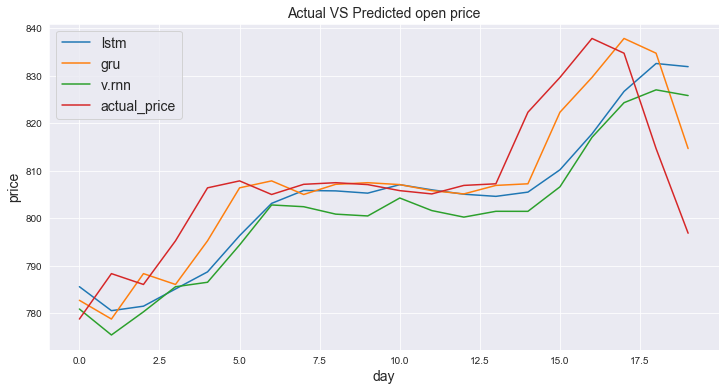

In [9]:
import seaborn as sns
sns.set_style("darkgrid")   

plt.figure(figsize=(12,6))

plt.plot(lstm_open, label='lstm')
plt.plot(gru_open, label='gru')
plt.plot(rnn_open, label='v.rnn')

plt.plot(y_test_open, label='actual_price')
plt.title('Actual VS Predicted open price', fontsize=14)
plt.xlabel('day', fontsize=14)
plt.ylabel('price', fontsize=14)
plt.legend(fontsize=14)

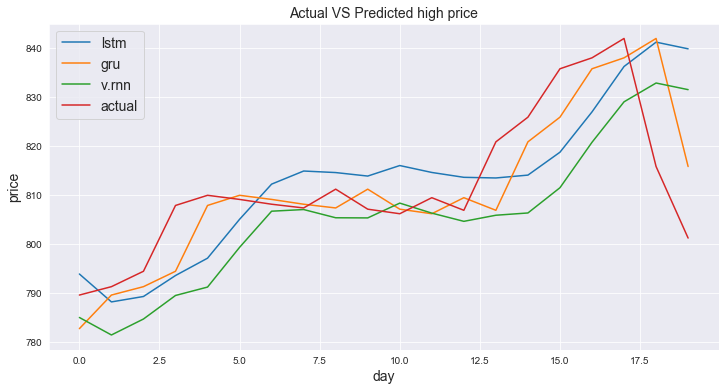

In [10]:
sns.set_style("darkgrid")   

plt.figure(figsize=(12,6))


plt.plot(lstm_high, label='lstm')
plt.plot(gru_high, label='gru')
plt.plot(rnn_high, label='v.rnn')
plt.plot(y_test_high, label='actual')

plt.title('Actual VS Predicted high price', fontsize=14)
plt.xlabel('day',fontsize=14)
plt.ylabel('price', fontsize=14)
plt.legend(fontsize=14)

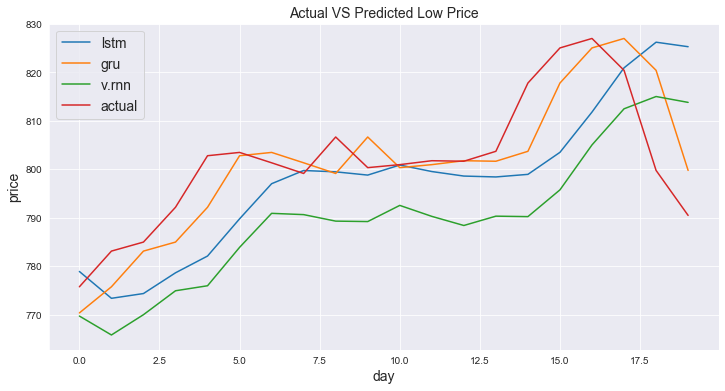

In [11]:
sns.set_style("darkgrid")   
plt.figure(figsize=(12,6))

plt.plot(lstm_low, label='lstm')
plt.plot(gru_low, label='gru')
plt.plot(rnn_low, label='v.rnn' )
plt.plot(y_test_low, label='actual')

plt.title('Actual VS Predicted Low Price', fontsize=14)
plt.xlabel('day', fontsize=14)
plt.ylabel('price', fontsize=14)
plt.legend(fontsize=14)

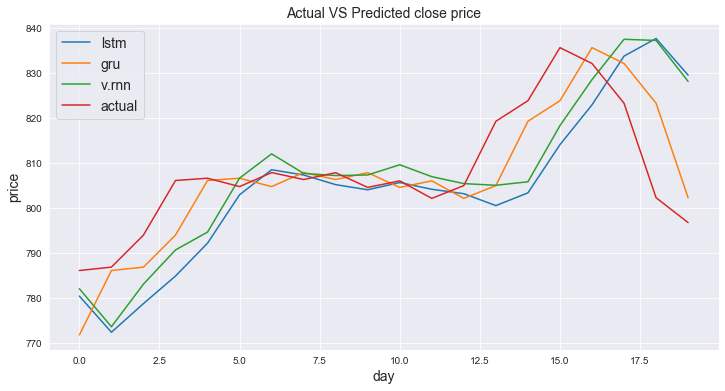

In [12]:
sns.set_style("darkgrid")   

plt.figure(figsize=(12,6))

plt.plot(lstm_close, label='lstm')
plt.plot(gru_close, label='gru')
plt.plot(rnn_close, label='v.rnn')
plt.plot(y_test_close, label='actual')

plt.title('Actual VS Predicted close price', fontsize=14)
plt.xlabel('day', fontsize=14)
plt.ylabel('price', fontsize=14)
plt.legend(fontsize=14)

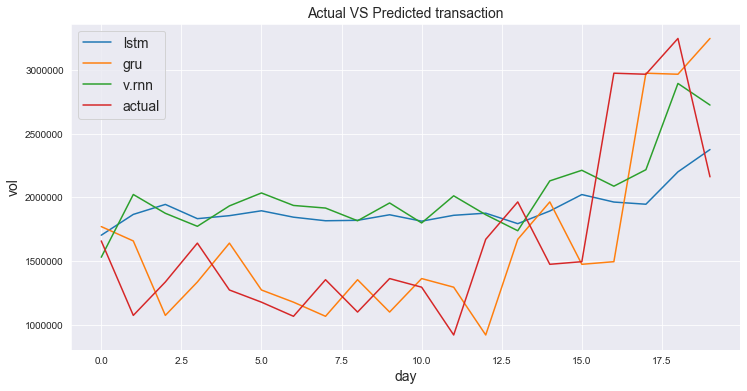

In [13]:
sns.set_style("darkgrid")   

plt.figure(figsize=(12,6))
plt.plot(lstm_vol, label='lstm')
plt.plot(gru_vol, label='gru')
plt.plot(rnn_vol, label='v.rnn')
plt.plot(y_test_vol, label='actual')

plt.title('Actual VS Predicted transaction', fontsize=14)
plt.xlabel('day', fontsize=14)
plt.ylabel('vol', fontsize=14)
plt.legend(fontsize=14)